In [2]:
import uproot
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

In [3]:
class BranchJet:
    def __init__(self,file):
        self.file = file
        self.length = len(file["Jet.PT"].array())
        self.PT = file["Jet.PT"].array()
        self.Eta =  file["Jet.Eta"].array()
        self.Phi = file["Jet.Phi"].array()
        self.Mass = file["Jet.Mass"].array()
        self.BTag = file["Jet.BTag"].array()
   
    def BTag_At(self, i):
        return self.BTag[i]        
    def PT_At(self, i):
        return self.PT[i]
    def Eta_At(self, i):
        return self.Eta[i]
    def Phi_At(self, i):
        return self.Phi[i]
    def Mass_At(self, i):
        return self.Mass[i]
    def y_At(self, i):
        pT=self.PT[i]
        eta=self.Eta[i]
        pz=pT*np.sinh(eta)
        m=self.Mass[i]
        E=np.sqrt(m*m+pz*pz+pT*pT)
        
        return np.log((E+pz)/np.sqrt(m*m+pT*pT))


In [4]:
def P4(pt,eta,phi,m):
    px, py, pz = pt*np.cos(phi), pt*np.sin(phi),pt*np.sinh(eta)
    e = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    
    return np.array([e,px,py,pz])

In [5]:
def M(P4):
    
    return np.sqrt((P4[0])**2-(P4[1])**2-(P4[2])**2-(P4[3])**2)

In [72]:
filepath = "./pp4j.root"

file = uproot.open(filepath)["Delphes;1"]

In [73]:
Jet = BranchJet(file)

In [65]:
print(Jet.Mass[0])


[5.9692383 6.9392247 5.2782845]


In [74]:
M_4j=[]
for i in range(Jet.length):
    if len(Jet.PT_At(i)) < 4:
        continue
    P4_0=P4(Jet.PT[i][0],Jet.Eta[i][0],Jet.Phi[i][0],Jet.Mass[i][0])
    P4_1=P4(Jet.PT[i][1],Jet.Eta[i][1],Jet.Phi[i][1],Jet.Mass[i][1])
    P4_2=P4(Jet.PT[i][2],Jet.Eta[i][2],Jet.Phi[i][2],Jet.Mass[i][2])
    P4_3=P4(Jet.PT[i][3],Jet.Eta[i][3],Jet.Phi[i][3],Jet.Mass[i][3])
    P4_total=P4_0+P4_1+P4_2+P4_3
    M_4j.append(M(P4_total))
        

In [41]:
PT_led=[]
PT_subled=[]
for i in range(Jet.length):
    if len(Jet.PT_At(i)) < 4:
        continue
    PT_led.append(Jet.PT[i][0])
    PT_subled.append(Jet.PT[i][1])
        

In [119]:
print(len(M_4j))

3705


In [75]:
#M_4j_hww = M_4j
#M_4j_ppzz = M_4j
#M_4j_ppww = M_4j
#M_4j_pptt = M_4j
M_4j_pp4j = M_4j
#PT_led_hww = PT_led
#PT_subled_hww = PT_subled
#PT_led_pp4j = PT_led
#PT_subled_pp4j = PT_subled
#PT_led_pptt = PT_led
#PT_subled_pptt = PT_subled
#PT_led_ppww = PT_led
#PT_subled_ppww = PT_subled
#PT_led_ppzz = PT_led
#PT_subled_ppzz = PT_subled

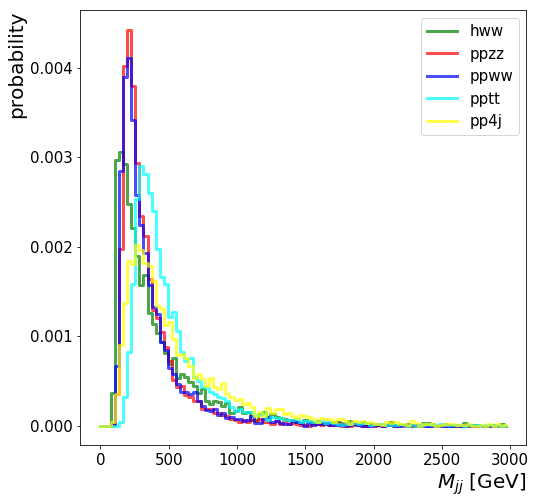

In [76]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,3000,101)

hist_ggh, bins_ggh = np.histogram(M_4j_hww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "green", where='mid',linewidth=3, alpha=0.7,label="hww") 
hist_ggh, bins_ggh = np.histogram(M_4j_ppzz , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "red", where='mid',linewidth=3, alpha=0.7,label="ppzz") 
hist_ggh, bins_ggh = np.histogram(M_4j_ppww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppww") 
hist_ggh, bins_ggh = np.histogram(M_4j_pptt , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "cyan", where='mid',linewidth=3, alpha=0.7,label="pptt") 
hist_ggh, bins_ggh = np.histogram(M_4j_pp4j , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "yellow", where='mid',linewidth=3, alpha=0.7,label="pp4j") 

# plt.yscale('log') 
plt.xlabel("$M_{jj}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

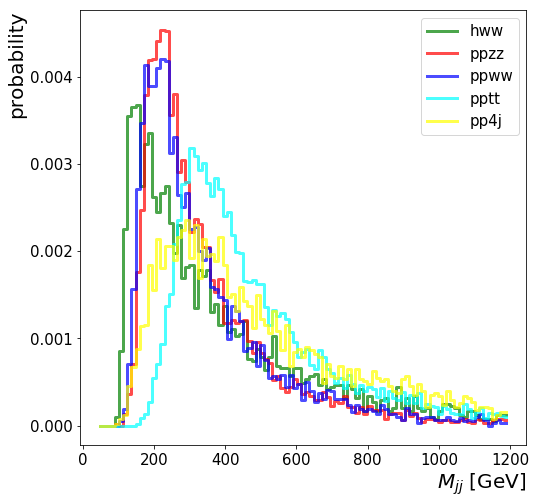

In [80]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(50,1200,100)

hist_ggh, bins_ggh = np.histogram(M_4j_hww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "green", where='mid',linewidth=3, alpha=0.7,label="hww") 
hist_ggh, bins_ggh = np.histogram(M_4j_ppzz , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "red", where='mid',linewidth=3, alpha=0.7,label="ppzz") 
hist_ggh, bins_ggh = np.histogram(M_4j_ppww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppww") 
hist_ggh, bins_ggh = np.histogram(M_4j_pptt , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "cyan", where='mid',linewidth=3, alpha=0.7,label="pptt") 
hist_ggh, bins_ggh = np.histogram(M_4j_pp4j , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "yellow", where='mid',linewidth=3, alpha=0.7,label="pp4j") 

# plt.yscale('log') 
plt.xlabel("$M_{jj}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

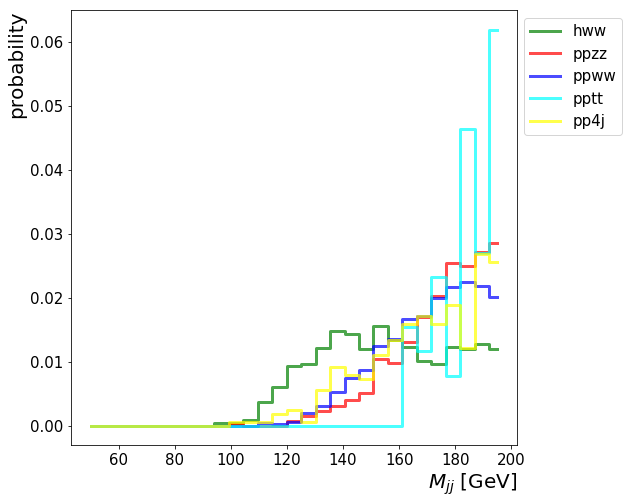

In [83]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(50,200,30)

hist_ggh, bins_ggh = np.histogram(M_4j_hww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "green", where='mid',linewidth=3, alpha=0.7,label="hww") 
hist_ggh, bins_ggh = np.histogram(M_4j_ppzz , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "red", where='mid',linewidth=3, alpha=0.7,label="ppzz") 
hist_ggh, bins_ggh = np.histogram(M_4j_ppww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppww") 
hist_ggh, bins_ggh = np.histogram(M_4j_pptt , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "cyan", where='mid',linewidth=3, alpha=0.7,label="pptt") 
hist_ggh, bins_ggh = np.histogram(M_4j_pp4j , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "yellow", where='mid',linewidth=3, alpha=0.7,label="pp4j") 

# plt.yscale('log') 
plt.xlabel("$M_{jj}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

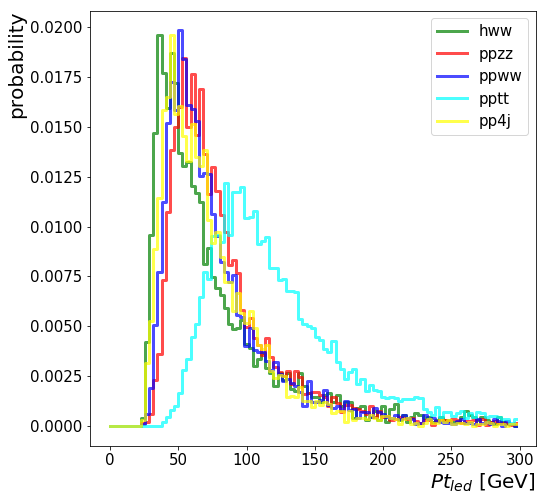

In [53]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,300,100)

hist_ggh, bins_ggh = np.histogram(PT_led_hww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "green", where='mid',linewidth=3, alpha=0.7,label="hww") 
hist_ggh, bins_ggh = np.histogram(PT_led_ppzz , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "red", where='mid',linewidth=3, alpha=0.7,label="ppzz") 
hist_ggh, bins_ggh = np.histogram(PT_led_ppww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppww") 
hist_ggh, bins_ggh = np.histogram(PT_led_pptt , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "cyan", where='mid',linewidth=3, alpha=0.7,label="pptt") 
hist_ggh, bins_ggh = np.histogram(PT_led_pp4j , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "yellow", where='mid',linewidth=3, alpha=0.7,label="pp4j") 

# plt.yscale('log') 
plt.xlabel("$Pt_{led}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

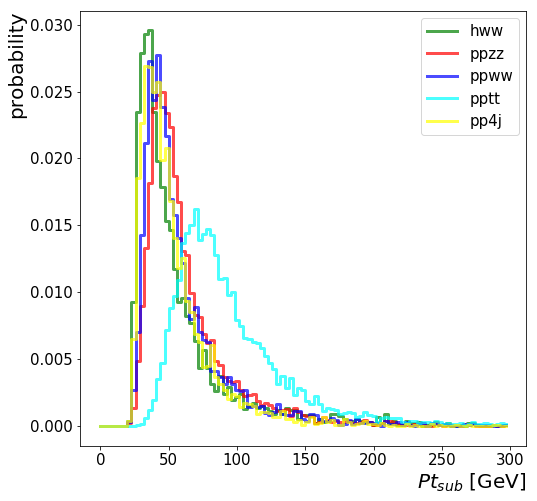

In [54]:
plt.figure(figsize=(8,8)) # plotsize
bin_size = np.linspace(0,300,100)

hist_ggh, bins_ggh = np.histogram(PT_subled_hww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "green", where='mid',linewidth=3, alpha=0.7,label="hww") 
hist_ggh, bins_ggh = np.histogram(PT_subled_ppzz , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "red", where='mid',linewidth=3, alpha=0.7,label="ppzz") 
hist_ggh, bins_ggh = np.histogram(PT_subled_ppww , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "blue", where='mid',linewidth=3, alpha=0.7,label="ppww") 
hist_ggh, bins_ggh = np.histogram(PT_subled_pptt , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "cyan", where='mid',linewidth=3, alpha=0.7,label="pptt") 
hist_ggh, bins_ggh = np.histogram(PT_subled_pp4j , bins=bin_size,density=True)
plt.step(bins_ggh[:-1], hist_ggh.astype(np.float32), color = "yellow", where='mid',linewidth=3, alpha=0.7,label="pp4j") 

# plt.yscale('log') 
plt.xlabel("$Pt_{sub}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("probability", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15) # plot label tag
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()